In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random

In [2]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('testing_data.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   week                                        3356 non-null   object 
 1   year                                        3356 non-null   int64  
 2   month                                       3356 non-null   int64  
 3   week_number                                 3356 non-null   int64  
 4   sku                                         3356 non-null   int64  
 5   price                                       3356 non-null   float64
 6   avg_price                                   3356 non-null   float64
 7   price_difference                            3356 non-null   float64
 8   price_lag_1                                 3356 non-null   float64
 9   price_lag_2                                 3356 non-null   float64
 10  price_lag_di

In [4]:
# Convert 'week' column to datetime
train['week'] = pd.to_datetime(train['week'])

# Setting 'week' as the index
train.set_index('week', inplace=True)

In [5]:
train.head()

,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,price_lag_difference_1,...,functionality_vr headset,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white
week,,,,,,,,,,,,,,,,,,,,,
2016-11-14,0,11,46,25,-0.873500,-0.774909,-0.405397,-0.867997,-0.891979,-0.031512,...,False,False,False,True,False,False,False,False,False,False
2016-11-14,0,11,46,17,-0.589903,-0.576474,-0.158827,-0.126404,-0.423201,-2.352226,...,False,True,False,False,False,False,False,False,False,False
2016-11-14,0,11,46,40,-0.836663,-0.576474,-0.746772,-0.887140,-0.884177,0.252437,...,False,False,False,False,False,False,False,False,False,False
2016-11-14,0,11,46,18,1.547817,0.808030,1.940435,1.549861,1.550724,-0.003956,...,False,False,False,False,False,False,False,False,False,False
2016-11-14,0,11,46,19,0.989833,0.452462,1.379918,1.422245,1.502026,-2.188086,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Convert 'week' column to datetime
test['week'] = pd.to_datetime(test['week'])

# Setting 'week' as the index
test.set_index('week', inplace=True)

In [7]:
test.head()

,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,price_lag_difference_1,...,functionality_vr headset,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white
week,,,,,,,,,,,,,,,,,,,,,
2018-05-14,2,5,20,9,3.049156,2.649416,1.535344,3.034939,3.753009,0.084703,...,False,False,False,False,False,False,False,False,False,False
2018-05-14,2,5,20,12,0.454281,0.728813,-0.493769,0.495372,0.508208,-0.206434,...,False,False,False,False,False,False,False,False,False,False
2018-05-14,2,5,20,17,-0.010666,-0.405650,0.851865,-0.089773,-0.389869,0.401001,...,False,True,False,False,False,False,False,False,False,False
2018-05-14,2,5,20,15,-0.715998,-0.405650,-0.828701,-0.691934,-0.539509,-0.124964,...,False,False,False,False,False,False,False,False,True,False
2018-05-14,2,5,20,2,0.485215,1.106950,-1.237843,0.150807,0.242969,1.697342,...,False,True,False,False,False,False,False,False,False,False


### ***Model Training:***

***Part 1***

In [8]:
# Separate features and target variable
Xtrain = train.drop(columns=['weekly_sales'], axis=1)
ytrain = train[['sku', 'weekly_sales']]

In [9]:
# Separate features and target variable
Xtest = test.drop(columns=['weekly_sales'], axis=1)
ytest = test[['sku', 'weekly_sales']]

In [10]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(Xtrain, ytrain.weekly_sales)

predictions = rf_model.predict(Xtest)
mae=mean_absolute_error(ytest.weekly_sales, predictions)
mse=mean_squared_error(ytest.weekly_sales, predictions)
rmse=np.sqrt(mse)
r2=r2_score(ytest.weekly_sales, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print('R-Squared:', r2)

Mean Absolute Error (MAE): 45.5604767580453
Root Mean Squared Error (RMSE): 204.19884070652304
R-Squared: 0.49730987179414887


In [11]:
# Create a DataFrame of actual and predicted values with SKU information
results_df = pd.DataFrame({'SKU': ytest.sku, 'Actual': ytest.weekly_sales, 'Predicted': predictions})
results_df.head()

,SKU,Actual,Predicted
week,,,
2018-05-14,9,80.0,84.43
2018-05-14,12,28.0,17.69
2018-05-14,17,16.0,12.61
2018-05-14,15,301.0,435.56
2018-05-14,2,11.0,12.57


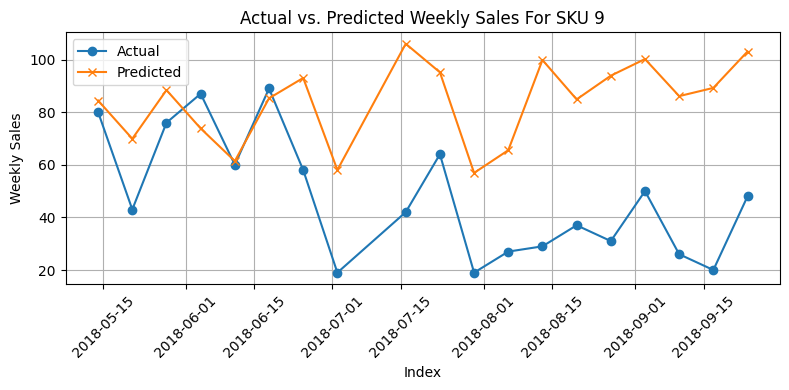

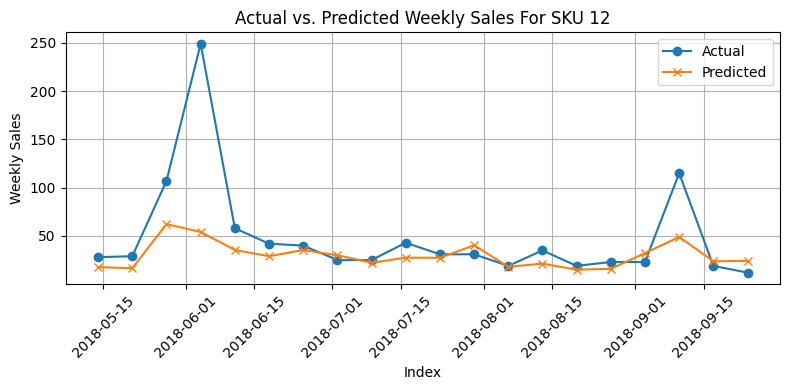

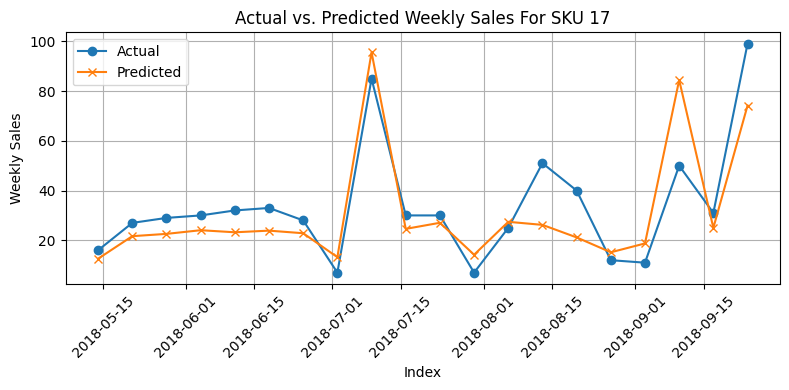

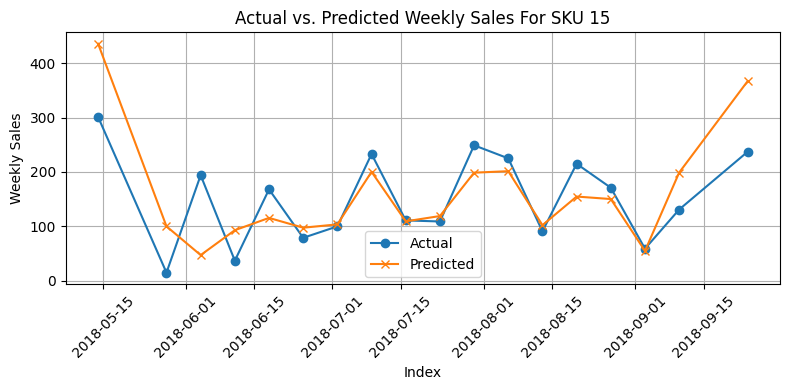

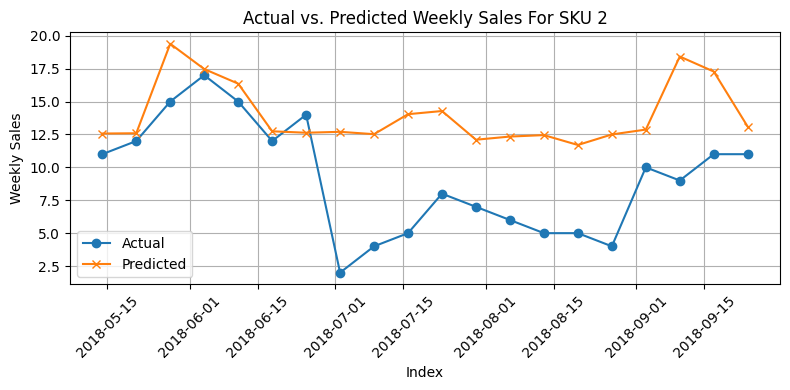

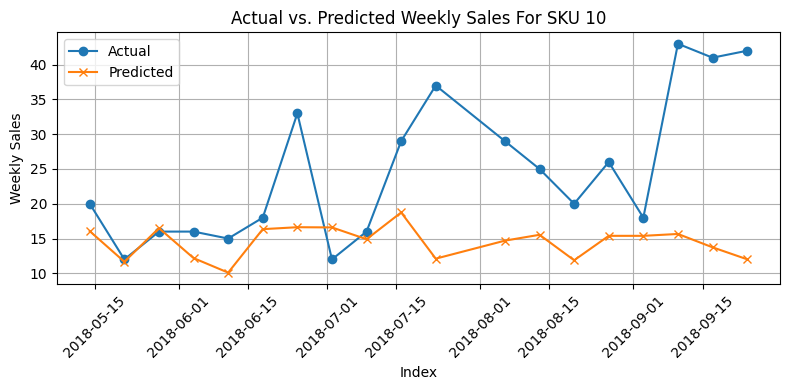

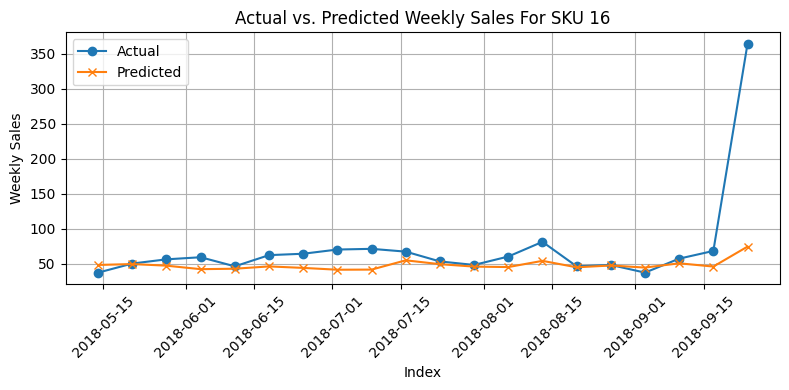

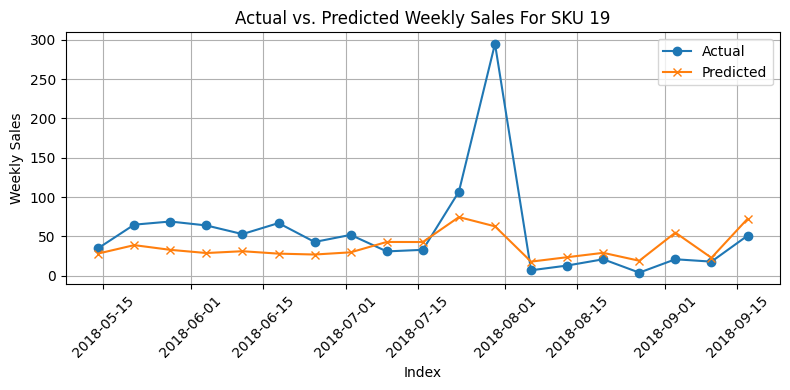

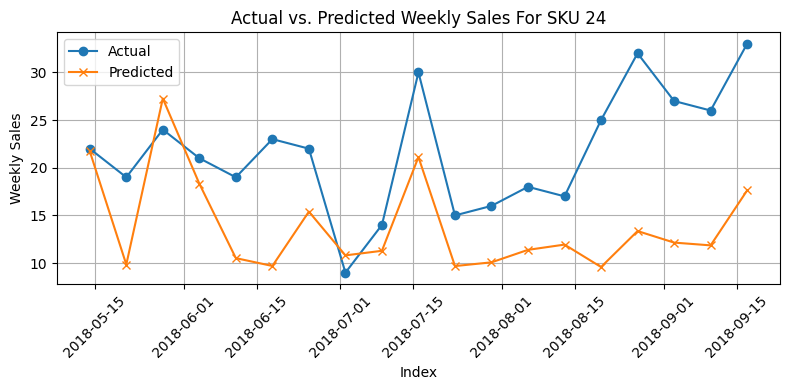

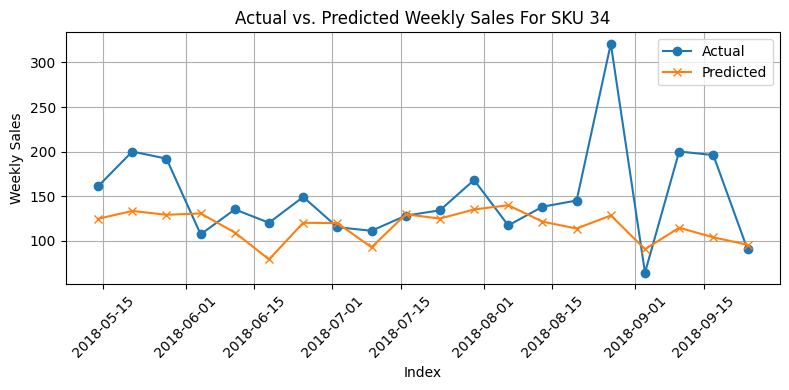

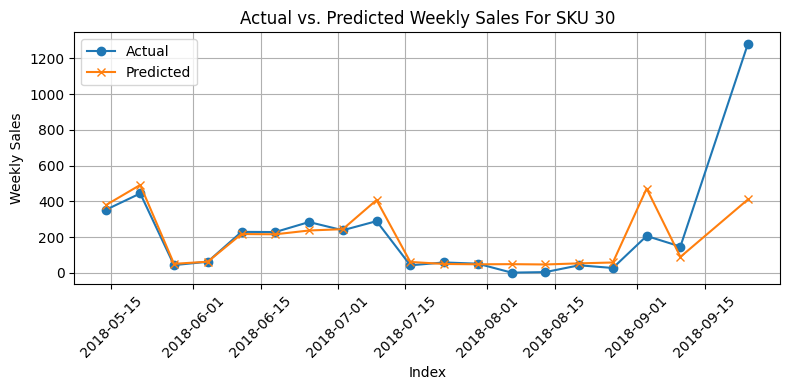

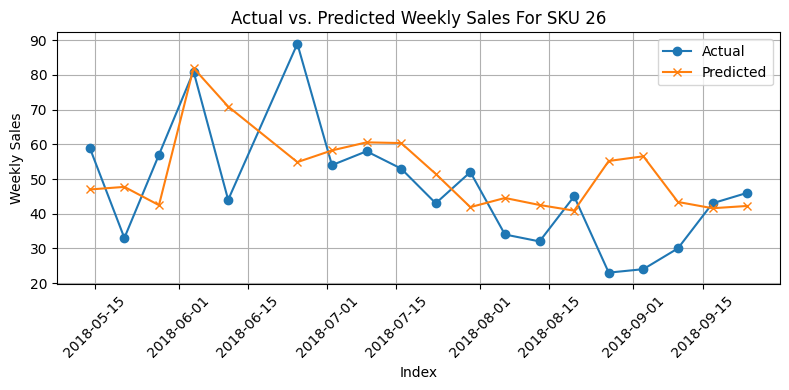

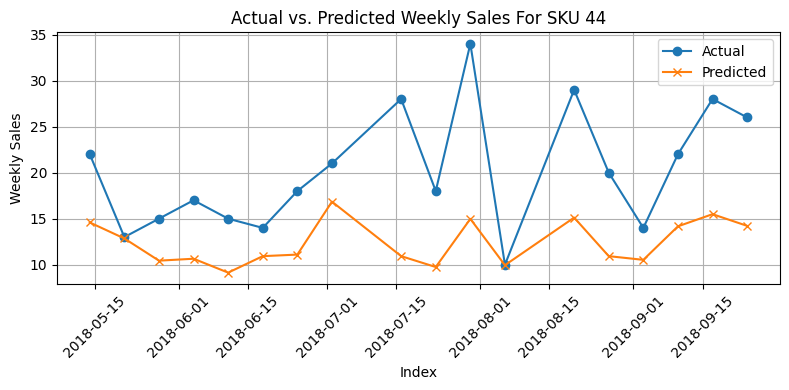

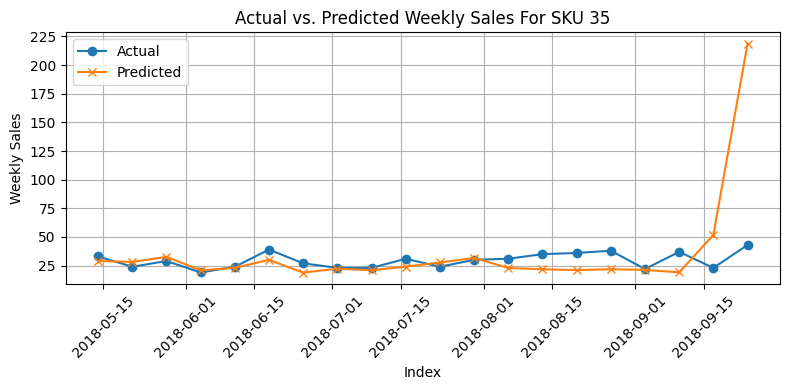

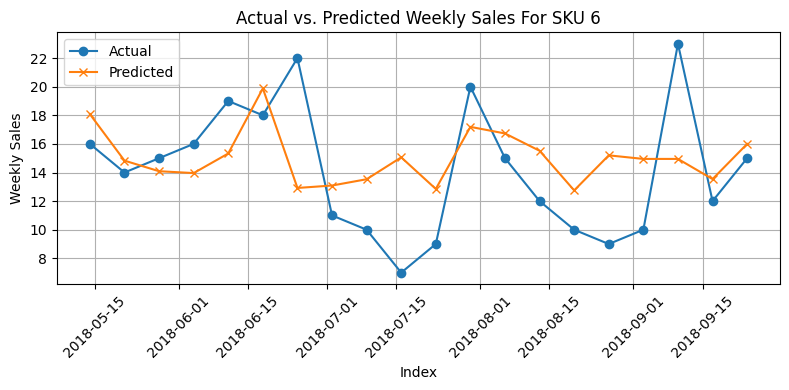

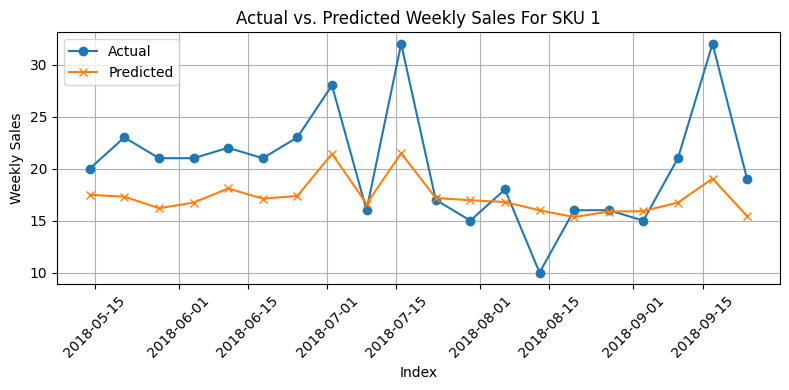

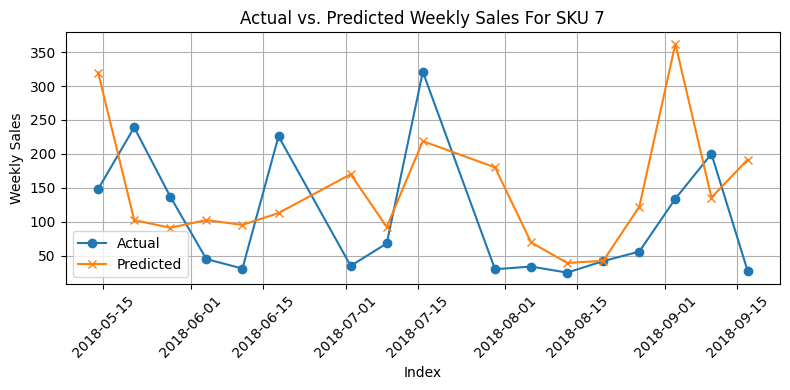

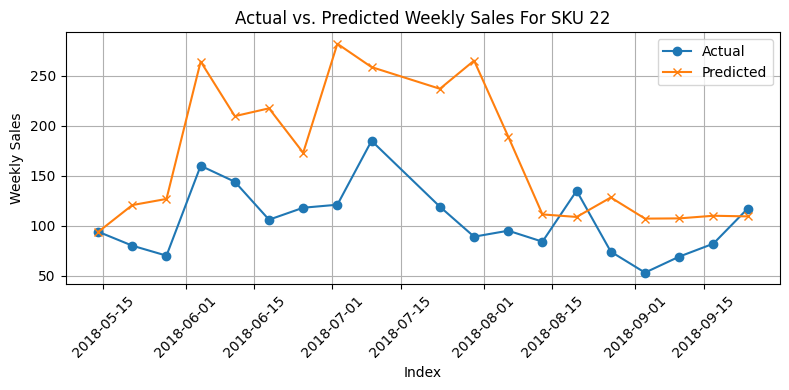

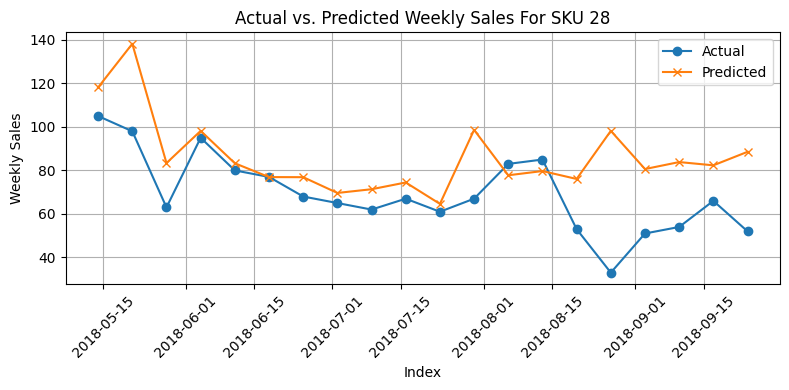

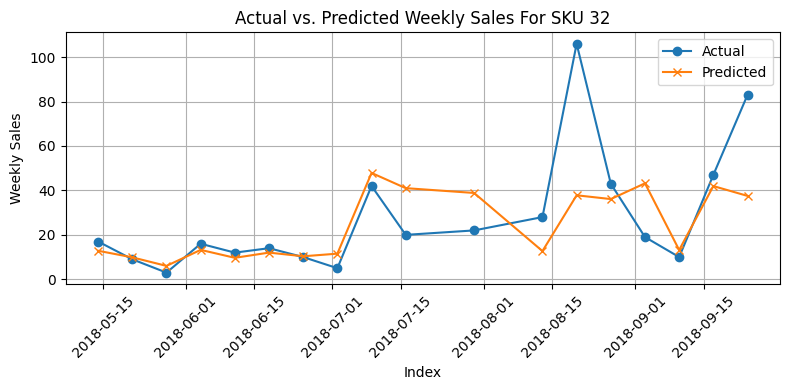

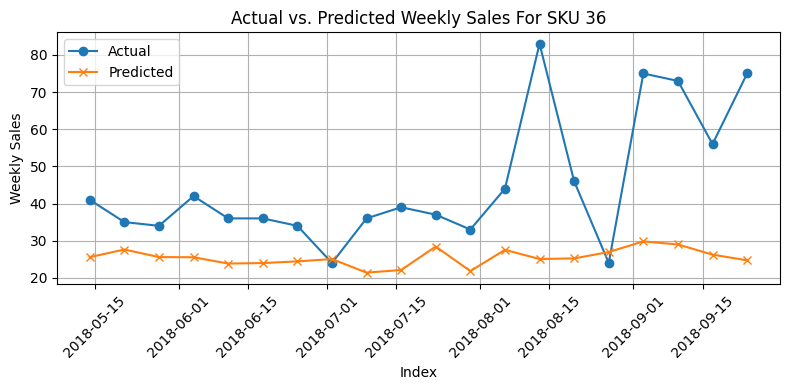

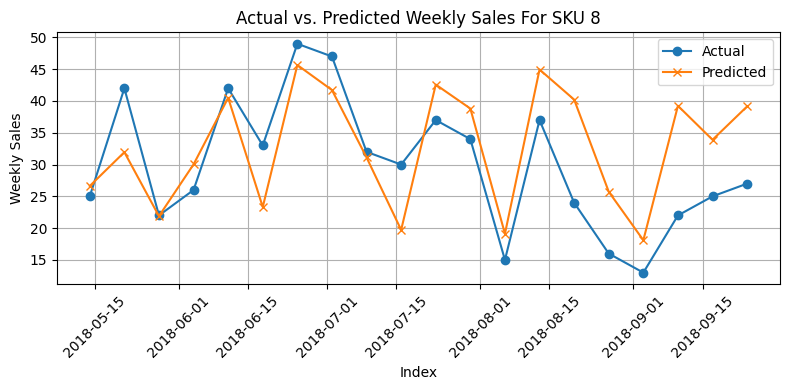

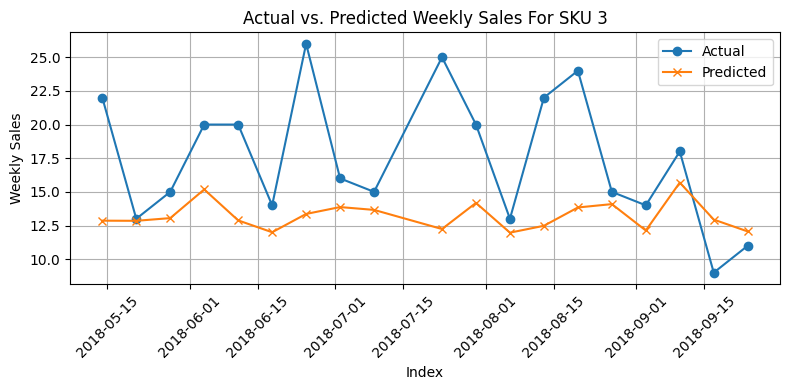

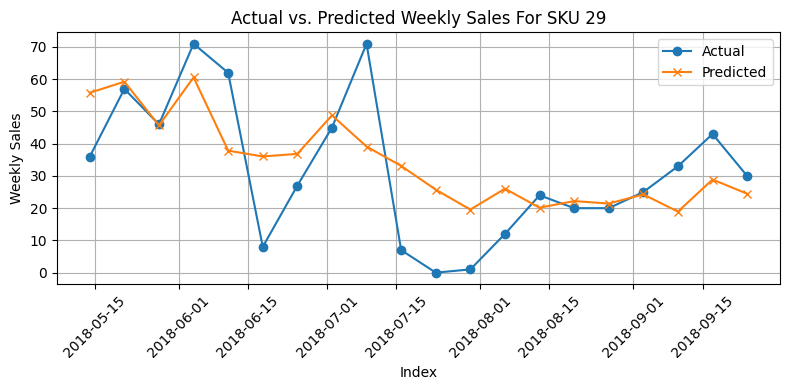

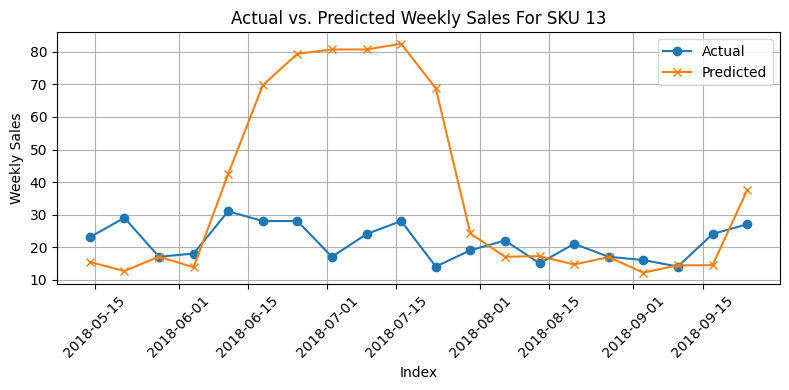

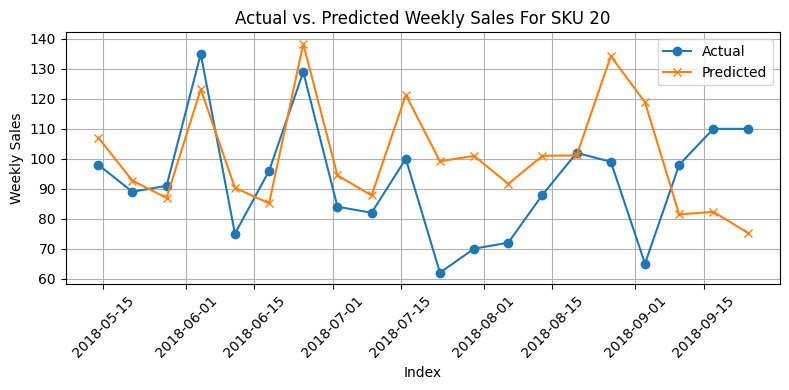

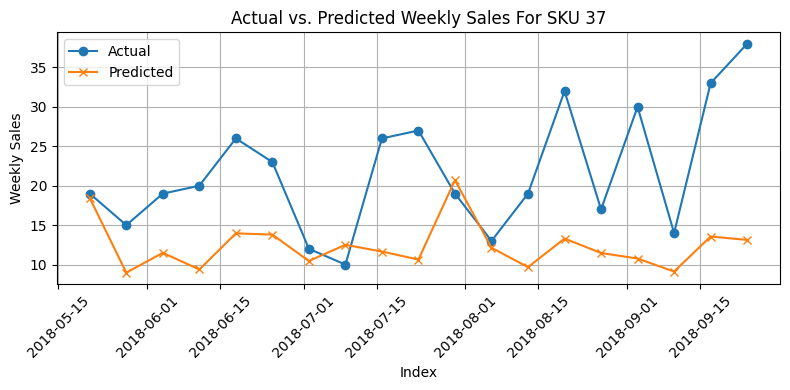

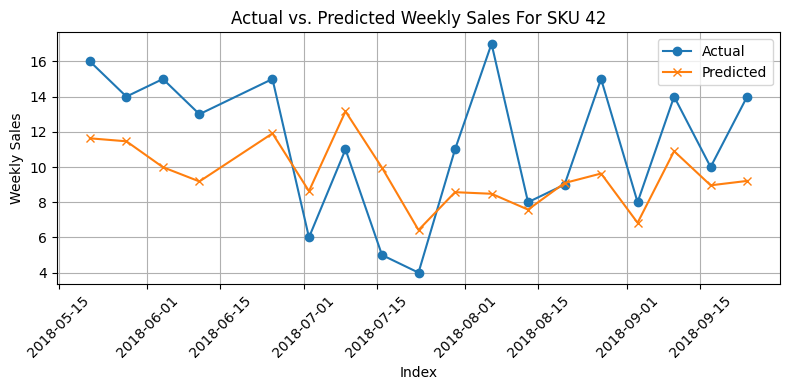

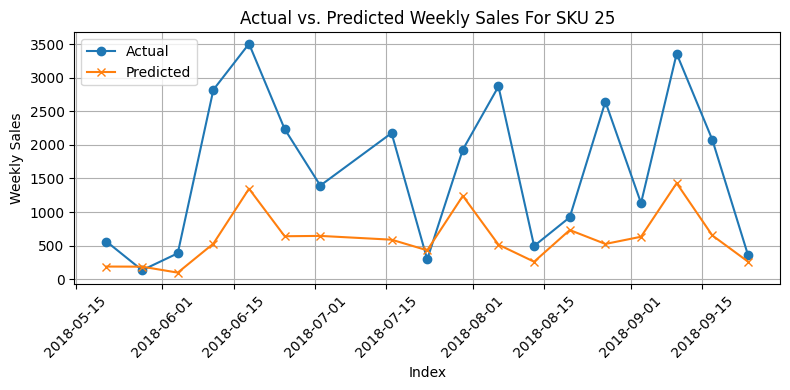

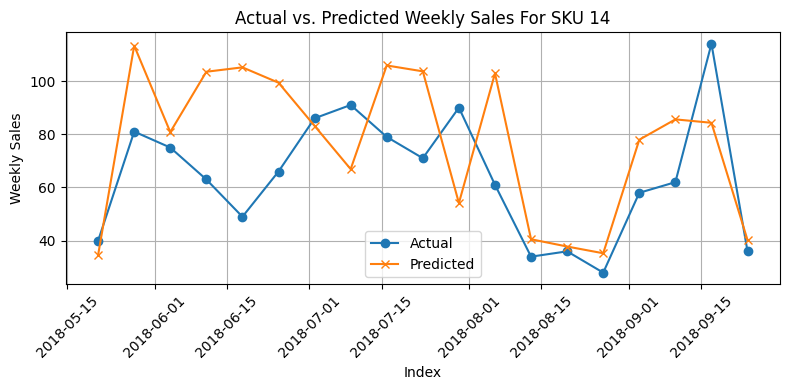

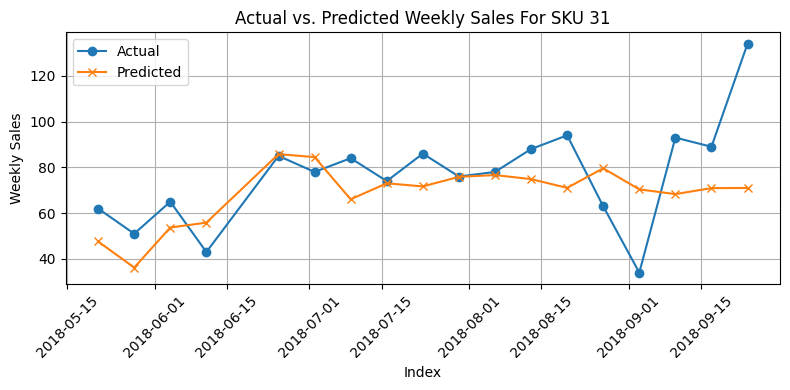

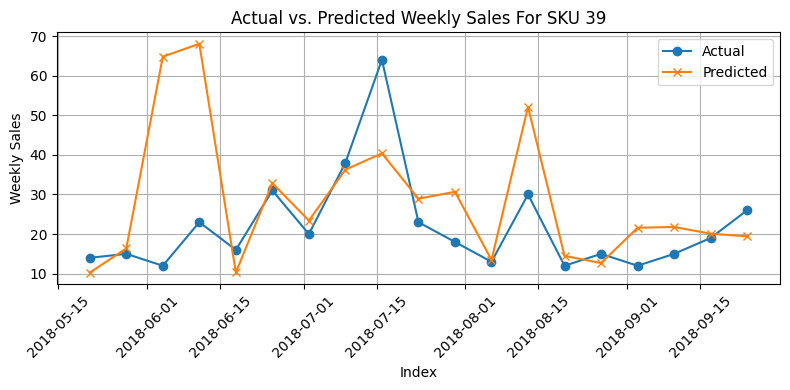

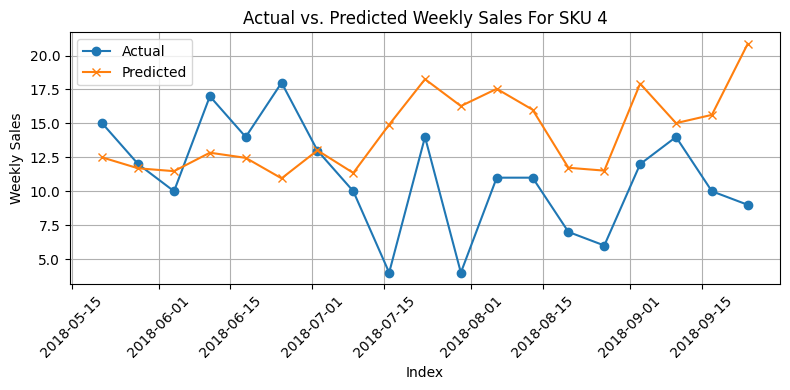

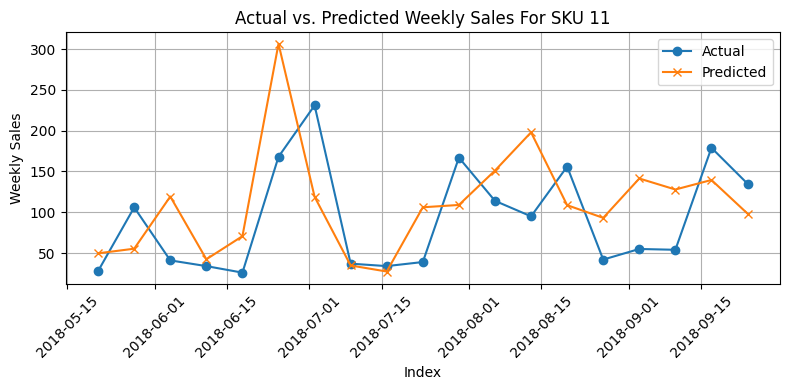

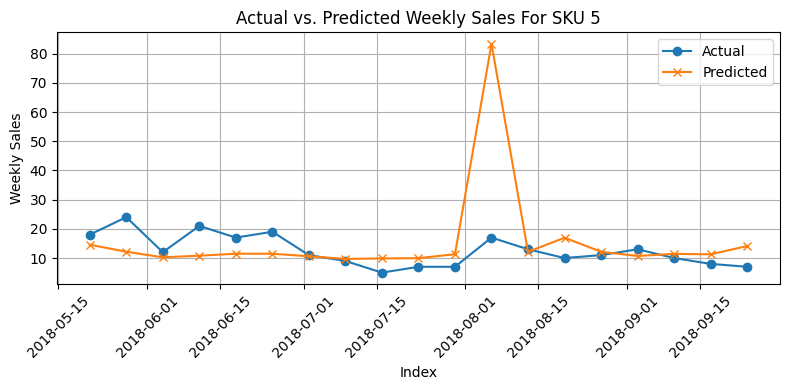

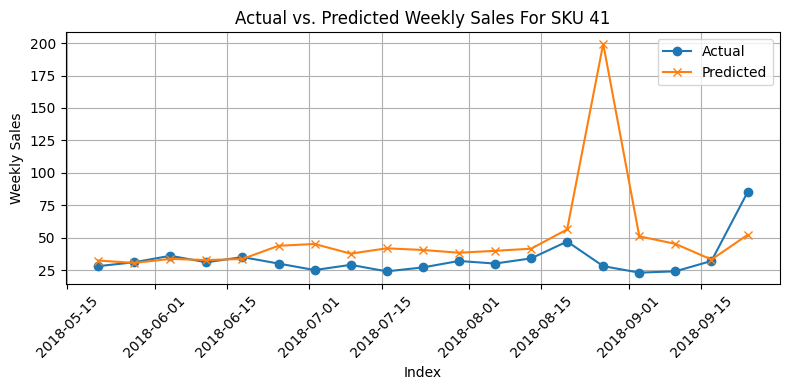

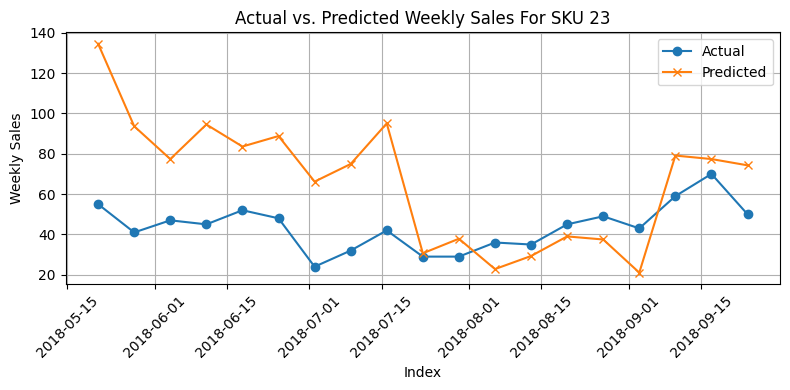

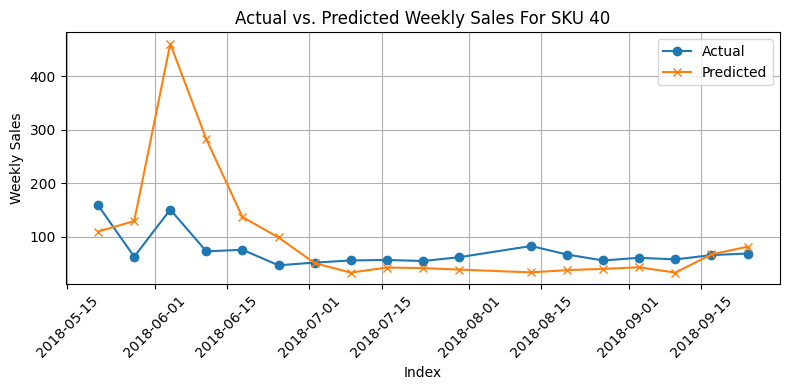

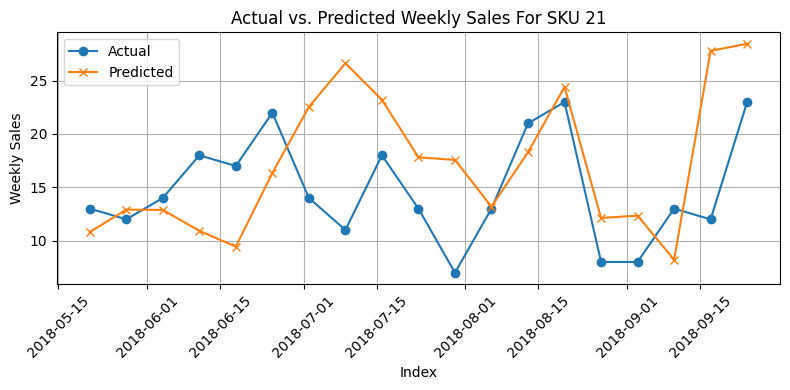

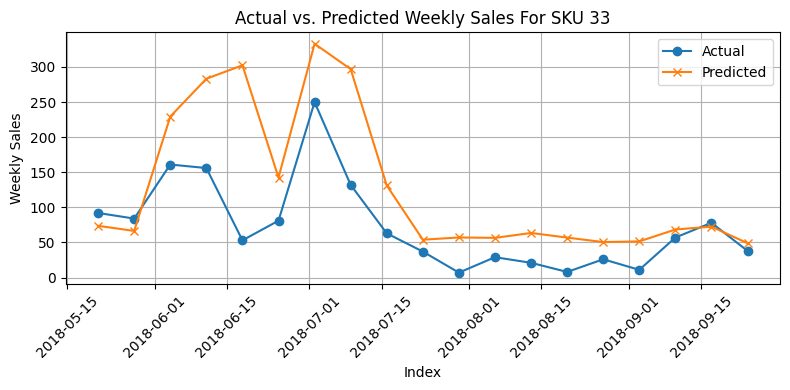

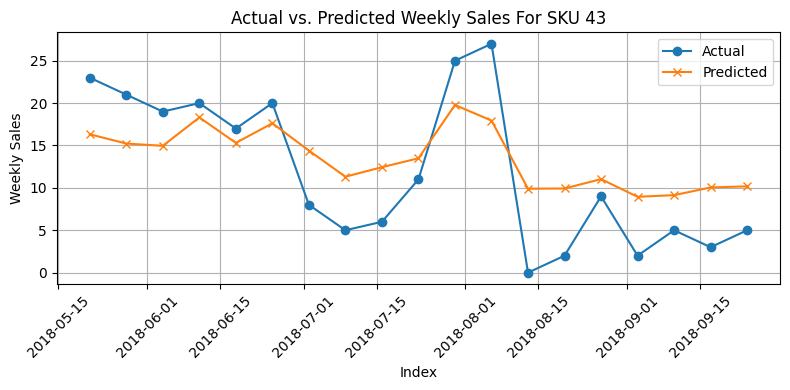

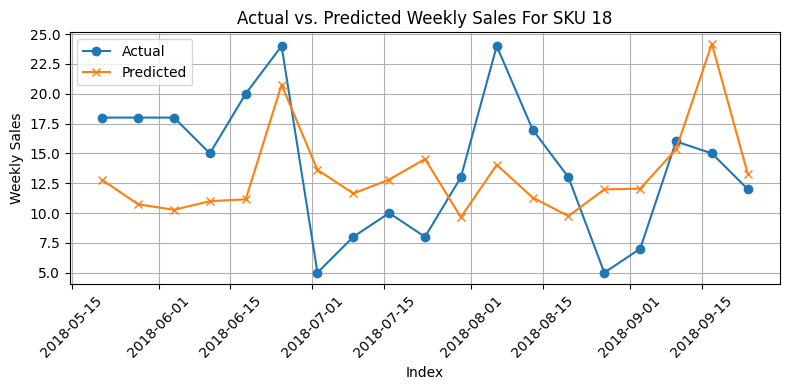

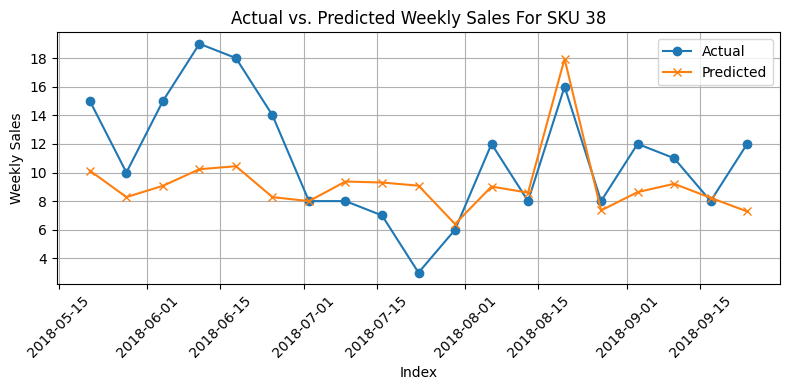

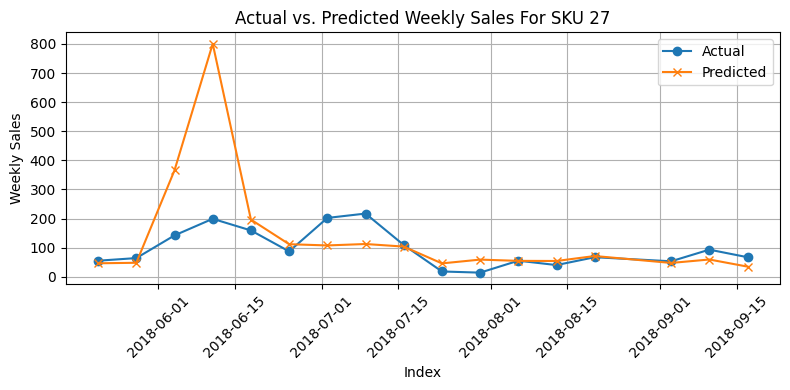

In [12]:
## Structure by SKU ##
skuSet = list(results_df.SKU.unique())

for i in skuSet:
    sku_i = results_df[results_df.SKU==i]
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(8, 4))
    plt.plot(sku_i.index, sku_i['Actual'], label='Actual', marker='o')
    plt.plot(sku_i.index, sku_i['Predicted'], label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Weekly Sales For SKU {}'.format(i))
    plt.xlabel('Index')
    plt.ylabel('Weekly Sales')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [14]:
feature_importances_df = pd.DataFrame({'Feature': Xtrain.columns, 
                                       'Importance': rf_model.feature_importances_})

# Sort the DataFrame by Importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the top 44 features and their importances
top_33_features = feature_importances_df.head(44)
print(top_33_features)

                                       Feature    Importance
4                                        price  4.469968e-01
3                                          sku  1.454906e-01
7                                  price_lag_1  7.145730e-02
8                                  price_lag_2  5.434108e-02
5                                    avg_price  5.254022e-02
6                             price_difference  4.836916e-02
9                       price_lag_difference_1  3.905975e-02
27                                  color_grey  3.606040e-02
10                      price_lag_difference_2  2.740129e-02
26                                 color_green  2.395449e-02
2                                  week_number  1.602619e-02
1                                        month  7.121306e-03
12                                      vendor  6.840727e-03
19  functionality_portable smartphone chargers  5.791850e-03
18      functionality_mobile phone accessories  4.518610e-03
0                       

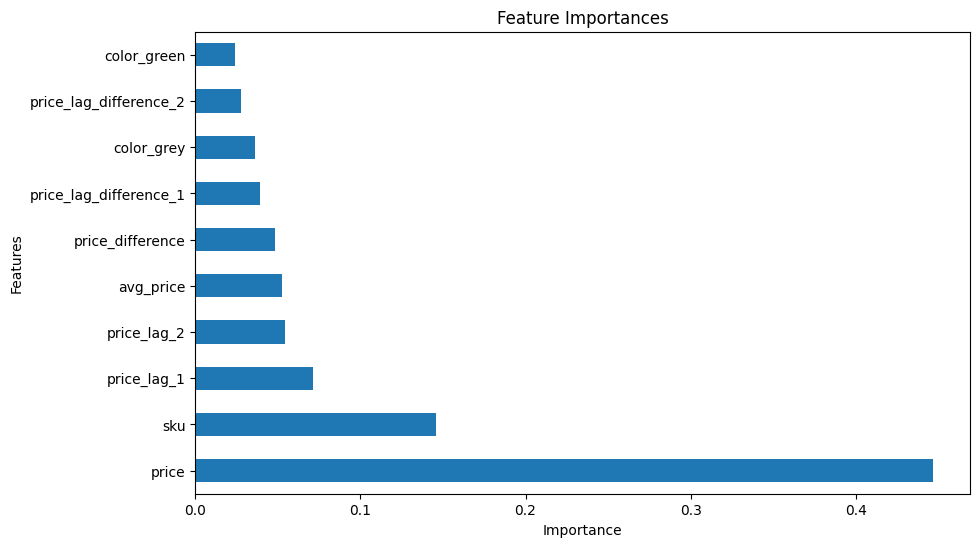

In [15]:
# Convert feature importances to a pandas Series
feature_importances = pd.Series(rf_model.feature_importances_, index=Xtrain.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances[:10].plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

***Structure Train Data***

In [86]:
## Structure by SKU ##
train_skuSet = list(train.sku.unique())
train_skuData = {}
colnames = [i for i in train.columns if i not in ["weekly_sales", "sku"] ]
for i in train_skuSet:
  df_i = train[train.sku == i]
  train_skuData[i] = {'X': df_i[colnames], 'y': df_i.weekly_sales}

***Structure Test Data***

In [87]:
## Structure by SKU ##
test_skuSet = list(test.sku.unique())
test_skuData = {}
colnames = [i for i in test.columns if i not in ["weekly_sales", "sku"] ]
for i in test_skuSet:
  df_i = test[test.sku == i]
  test_skuData[i] = {'X': df_i[colnames], 'y': df_i.weekly_sales}

In [88]:
## Decentralized Structure ##
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []

for i in skuSet:
    
    X_train_i, X_test_i = train_skuData[i]['X'], test_skuData[i]['X']
    y_train_i,y_test_i = train_skuData[i]['y'], test_skuData[i]['y']
    
    X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    y_test += list(y_test_i) #creating the complete training array
    y_train += list(y_train_i) #creating the complete testing array

***Modelling***

In [90]:
X_dict_subsplit = {}
y_dict_subsplit = {}

y_validation = []
y_subtrain = []

for i in skuSet:

  X_train_i,X_test_i = X_dict[i]["train"].iloc[:-20], X_dict[i]["train"].iloc[-20:]
  y_train_i,y_test_i = y_dict[i]["train"].iloc[:-20], y_dict[i]["train"].iloc[-20:]

  X_dict_subsplit[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict_subsplit[i] = {'train': y_train_i, 'test': y_test_i}

  y_validation += list(y_test_i) #creating the complete training array
  y_subtrain += list(y_train_i) #creating the complete testing array

In [99]:
max_features_ = list(range(2,33))
max_depth_ = list(range(2,10))
params=[]
maximum_score=0

#selection of parameters to test
random.seed(5)
mf_ = random.choices(max_features_, k=60)
md_ = random.choices(max_depth_, k=50)

## Iterations to select best model
for i in range (20):
  print('Model number:',i+1)
  #selection of parameters to test
  mf = mf_[i]
  md = md_[i]
  print('  Parameters:',[mf,md])
  #model
  y_pred = []
  for i in skuSet:
    model_i = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0).fit(X_dict_subsplit[i]['train'] , y_dict_subsplit[i]['train'])
    y_pred += list(model_i.predict(X_dict_subsplit[i]['test']))
  score=r2_score(y_validation, np.array(y_pred))
  #compare performances on validation data
  if score > maximum_score:
    params = [mf,md]
    maximum_score = score

## Test on fresh data
mf,md=params
y_pred = []
for i in skuSet:
  model_i = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0).fit(X_dict[i]['train'] , y_dict[i]['train'])
  y_pred += list(model_i.predict(X_dict[i]['test']))
oos_r2=r2_score(y_test, np.array(y_pred))
mae=mean_absolute_error(y_test, np.array(y_pred))
mse=mean_squared_error(y_test, np.array(y_pred))
rmse=np.sqrt(mse)

print('\nBest Model:')
print('Parameters:',params)
print('OOS R2:', oos_r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Model number: 1
  Parameters: [21, 7]
Model number: 2
  Parameters: [24, 8]
Model number: 3
  Parameters: [26, 2]
Model number: 4
  Parameters: [31, 8]
Model number: 5
  Parameters: [24, 4]
Model number: 6
  Parameters: [30, 6]
Model number: 7
  Parameters: [2, 2]
Model number: 8
  Parameters: [16, 2]
Model number: 9
  Parameters: [31, 3]
Model number: 10
  Parameters: [22, 9]
Model number: 11
  Parameters: [29, 3]
Model number: 12
  Parameters: [5, 8]
Model number: 13
  Parameters: [16, 9]
Model number: 14
  Parameters: [9, 9]
Model number: 15
  Parameters: [18, 4]
Model number: 16
  Parameters: [19, 4]
Model number: 17
  Parameters: [2, 6]
Model number: 18
  Parameters: [8, 8]
Model number: 19
  Parameters: [10, 2]
Model number: 20
  Parameters: [30, 7]

Best Model:
Parameters: [26, 2]
OOS R2: 0.6755966700026869
Mean Absolute Error (MAE): 38.642322405850265
Root Mean Squared Error (RMSE): 164.03848347489784


In [102]:
mf,md=params
y_pred = []
for i in skuSet:
    model_i = RandomForestRegressor(max_features=mf, max_depth=md, random_state=0).fit(X_dict[i]['train'] , y_dict[i]['train'])
    skuModels[i] = model_i
    
    y_pred += list(model_i.predict(X_dict[i]['test']))
oos_r2=r2_score(y_test, np.array(y_pred))
mae=mean_absolute_error(y_test, np.array(y_pred))
mse=mean_squared_error(y_test, np.array(y_pred))
rmse=np.sqrt(mse)

print('\nBest Model:')
print('Parameters:',params)
print('OOS R2:', oos_r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Best Model:
Parameters: [26, 2]
OOS R2: 0.6755966700026869
Mean Absolute Error (MAE): 38.642322405850265
Root Mean Squared Error (RMSE): 164.03848347489784


In [109]:
# Dictionary to store actual and predicted values for each SKU
results_dict = {'SKU': [], 'Actual': [], 'Predicted': []}

for i in skuSet:
    # Make predictions for the test set
    y_pred_i = skuModels[i].predict(X_dict[i]['test'])
    
    # Append actual and predicted values to the results dictionary
    results_dict['SKU'].extend([i] * len(y_pred_i))
    results_dict['Actual'].extend(y_dict[i]['test'])
    results_dict['Predicted'].extend(y_pred_i)

# Create a DataFrame from the results dictionary
results_df2 = pd.DataFrame(results_dict)

In [110]:
results_df2.sample(5)

,SKU,Actual,Predicted
647,13,23.0,14.676914
343,2,11.0,14.290841
399,34,321.0,126.497797
289,36,36.0,22.829629
545,43,25.0,15.434649


In [114]:
import joblib
import os

In [115]:
# Directory to save the models
save_dir = "C:/Users/kagam/Documents/Final Project/Models"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterate over the dictionary of models and save each one
for sku, model in skuModels.items():
    # Construct the file path
    model_path = os.path.join(save_dir, f"model_{sku}.joblib")
    # Save the model
    joblib.dump(model, model_path)

print("Models saved successfully.")

Models saved successfully.
